## 7选3重叠分析

In [71]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [150]:
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")
chengji=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\5_chengji.csv")
# 当前在校学生信息
student_info.columns=[u'学生id',u'学生姓名',u'性别',u'民族',u'出生日期',u'班级名',u'家庭住址',u'家庭类型',u'政治面貌',u'班级id',u'班级学期',u'是否住校',u'是否退学',u'宿舍号']
# student_info['是否退学'].fillna(value=0) #将NaN替换为0
student_info['年级名']=student_info['班级名']
student_info['年级名'][student_info['年级名'].str.contains('高一')]=u'高一'
student_info['年级名'][student_info['年级名'].str.contains('高二')]=u'高二'
student_info['年级名'][student_info['年级名'].str.contains('高三')]=u'高三'
print('学生信息条数：',student_info.shape[0])
print('学生信息学期数量：',student_info['班级学期'].unique())
student_info.head(5)

学生信息条数： 1765
学生信息学期数量： ['2018-2019-1']


,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号,年级名
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN,高二
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0,高二
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0,高二
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN,高二
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN,高二


#### 学生信息表中只有一个学期，2018-2019年当前学期

In [151]:
# 学生成绩
chengji.columns=['考试id','考试编号','考试编码名称','考试学科id','考试学科名','考试学期','考试类型','考试开始时间','学生id','考试成绩','Z_score','T_score','等第']
# 使用pandas的to_datatime函数转换为标准日期格式
chengji['考试开始时间']=pd.to_datetime(chengji['考试开始时间'])
print('成绩记录条数：',chengji.shape[0])
print("成绩记录学期数量：",chengji['考试学期'].unique())
print("学生数量：",chengji['学生id'].unique().shape[0])
chengji.head()

成绩记录条数： 471686
成绩记录学期数量： ['2018-2019-1' '2017-2018-2' '2017-2018-1' '2016-2017-2' '2016-2017-1'
 '2015-2016-2' '2015-2016-1' '2014-2015-2' '2014-2015-1' '2013-2014-2'
 '2013-2014-1']
学生数量： 3869


,考试id,考试编号,考试编码名称,考试学科id,考试学科名,考试学期,考试类型,考试开始时间,学生id,考试成绩,Z_score,T_score,等第
0,149384,308,\t2018学年第一学期期末总评,NaN,NaN,2018-2019-1,5,2019-01-26,15477,76.0,NaN,NaN,NaN
1,149384,308,\t2018学年第一学期期末总评,NaN,NaN,2018-2019-1,5,2019-01-26,15478,79.0,NaN,NaN,NaN
2,149384,308,\t2018学年第一学期期末总评,NaN,NaN,2018-2019-1,5,2019-01-26,16121,80.0,NaN,NaN,NaN
3,149384,308,\t2018学年第一学期期末总评,NaN,NaN,2018-2019-1,5,2019-01-26,16122,77.0,NaN,NaN,NaN
4,149384,308,\t2018学年第一学期期末总评,NaN,NaN,2018-2019-1,5,2019-01-26,16119,79.0,NaN,NaN,NaN


#### 成绩表中包含11个学期

#### 将学生信息和成绩表合并，得出当前学期学生的具体信息

In [152]:
# 将学生信息和成绩表合并
info=pd.merge(chengji,student_info,on='学生id')
info=info[['学生id','学生姓名','班级名','考试学期','考试学科名','考试成绩','考试编码名称','年级名']]
print(info.shape[0])
info.head()

178689


,学生id,学生姓名,班级名,考试学期,考试学科名,考试成绩,考试编码名称,年级名
0,15477,董某某,白-高一(03),2018-2019-1,NaN,76.0,\t2018学年第一学期期末总评,高一
1,15477,董某某,白-高一(03),2018-2019-1,NaN,62.0,\t2018学年第一学期期末总评,高一
2,15477,董某某,白-高一(03),2018-2019-1,NaN,87.0,\t2018学年第一学期期末总评,高一
3,15477,董某某,白-高一(03),2018-2019-1,NaN,75.0,\t2018学年第一学期期末总评,高一
4,15477,董某某,白-高一(03),2018-2019-1,NaN,68.0,\t2018学年第一学期期末总评,高一


### 1.1  高三7选3人数分布

In [277]:
# 删除考试学科名为空值的行
Not_null=info.ix[info['考试学科名'].notnull()]

# 筛选7个科目
Not_null=Not_null.ix[(Not_null['考试学科名']=='政治')|(Not_null['考试学科名']=='物理')|(Not_null['考试学科名']=='地理')|(Not_null['考试学科名']=='历史')|
                    (Not_null['考试学科名']=='化学')|(Not_null['考试学科名']=='生物')|(Not_null['考试学科名']=='技术')]

# 删除缺考、免考
special=Not_null.ix[(Not_null['考试成绩']==-2)|(Not_null['考试成绩']==-3)]
Not_null1=Not_null[-Not_null['考试成绩'].isin(special['考试成绩'])]


# 筛选2018-2019学年第1学期，作为7选3的标准数据
Term=Not_null1.ix[Not_null1['考试学期']=='2018-2019-1']
print("学科种类：",Term['考试学科名'].unique())


# 筛选考试编码名称--2018学年第一学期高三十校联考 & 2018学年第一学期高三五校联考
shilian=Term.ix[Term['考试编码名称']=='2018学年第一学期高三十校联考']
print('期中考试年级名:',shilian['年级名'].unique())
#wulian=Term.ix[Term['考试编码名称']=='2018学年第一学期高三五校联考']
#print('高三五校联考:',wulian['年级名'].unique())

# 分组：每个高三学生的考试学科
shifen=shilian[['学生id','考试学科名']]
shifen=shifen.drop_duplicates()
shifen=shifen.sort_values(by=["学生id",'考试学科名'])  # 对学生id和考试学科名进行排序
select=shifen.groupby(['学生id'])['考试学科名'].apply(tuple)# 根据多列的值将多行合并成一行
select=select.reset_index()

# 分析7选3学科人数
zu=select.groupby(['考试学科名'])['学生id'].count()
zu=pd.DataFrame(zu).reset_index()
for i in range(zu.shape[0]):
    if (len(zu.ix[i,0]))!=3:
        zu.drop([i],inplace=True) # inplace=True，则会直接在原数据上进行删除操作，删除后无法返回。
zu.sort_values(by='学生id',inplace=True)
zu.head()

学科种类： ['政治' '地理' '物理' '化学' '生物' '历史' '技术']
期中考试年级名: ['高三']


,考试学科名,学生id
25,"(历史, 政治, 物理)",1
10,"(化学, 技术, 政治)",1
1,"(化学, 历史, 技术)",2
23,"(历史, 技术, 物理)",2
21,"(历史, 地理, 物理)",2


In [279]:
index=zu['考试学科名']
values=zu['学生id'].values

from pyecharts import Bar
bar=Bar('2018-2019-1学期，高三7选3人数',width=800,height=300)
bar.add('7选3',index,values,mark_point=['max','min'],yaxis_name='人数',xaxis_rotate=20,is_datazoom_show=True,datazoom_type="inside")
bar.render('D:\Entertainment\Heaven Pool\高三7选3人数.html')
bar

### 1.2  高三7选3比例分布

In [274]:
zu=select.groupby(['考试学科名'])['学生id'].count()
zu=pd.DataFrame(zu).reset_index()
for i in range(zu.shape[0]):
    if (len(zu.ix[i,0]))!=3:
        zu.drop([i],inplace=True) # inplace=True，则会直接在原数据上进行删除操作，删除后无法返回。
zu.sort_values(by='学生id',inplace=True)
zu=pd.Series(zu['学生id'].values,index=zu['考试学科名'])
percent=round(zu/zu.sum(), 4)*100
percent=percent.reset_index()

# 小数转为百分数
#f1 = lambda x :'%.2f%%'  %  (x*100)
#percent[[0]]=percent[[0]].applymap(f1)

from pyecharts import Bar
bar=Bar('2018-2019-1学期，高三7选3人数',width=800,height=300)
bar.add('7选3',percent['考试学科名'],percent[0].values,mark_point=['max','min'],yaxis_name='百分比',xaxis_rotate=20,is_datazoom_show=True,datazoom_type="inside")
bar.render('D:\Entertainment\Heaven Pool\高三7选3比例.html')
bar

#### matplotlib画图

In [ ]:
select=shilian.groupby(['学生id'])['考试学科名'].apply(tuple)# 根据多列的值将多行合并成一行
select=pd.DataFrame(select).reset_index()
#shifen=shifen.drop_duplicates()
num=select.groupby(['考试学科名'])["学生id"].count()
num=num.sort_values()# series数据按索引排序sort_index()和按值排序sort_value()
num

#wufen=wulian.groupby(['学生id'])['考试学科名'].apply(tuple)
#wufen=pd.DataFrame(wufen).reset_index()
#print(shifen.head())
#print(wufen.head())
select=pd.DataFrame(select).reset_index()
#shifen=shifen.drop_duplicates()
num=select.groupby(['考试学科名'])["学生id"].count()
num=num.sort_values()# series数据按索引排序sort_index()和按值排序sort_value()
num

#wufen=wulian.groupby(['学生id'])['考试学科名'].apply(tuple)
#wufen=pd.DataFrame(wufen).reset_index()
#print(shifen.head())
#print(wufen.head())

### 2.2  7选3组合分布  

In [283]:
# 删除免考的学生 -1为作弊，-2为缺考，-3为免考
special=info.ix[(info['考试成绩']==-2)|(Not_null['考试成绩']==-3)]
chengji=info[-info['考试成绩'].isin(special['考试成绩'])]

# 删除考试学科名为空值的行
chengji=info.ix[info['考试学科名'].notnull()]


# 筛选高二、高三学生
chengji=chengji.ix[(chengji['年级名']=='高二')|(chengji['年级名']=='高三')]


# 筛选7个考试科目
zhengzhi=chengji.ix[chengji['考试学科名']=='政治']
wuli=chengji.ix[chengji['考试学科名']=='物理']
shengwu=chengji.ix[chengji['考试学科名']=='生物']
dili=chengji.ix[chengji['考试学科名']=='地理']
huaxue=chengji.ix[chengji['考试学科名']=='化学']
lishi=chengji.ix[chengji['考试学科名']=='历史']
jishu=chengji.ix[chengji['考试学科名']=='技术']
kaoshi=pd.concat([zhengzhi,wuli,shengwu,dili,huaxue,lishi,jishu],axis=0)
kaoshi=kaoshi[['学生id','考试学科名','考试学期','考试编码名称']]


#对学生id和考试学科名进行去重
kaoshi=kaoshi[['学生id','考试学科名','考试学期']]
kaoshi = kaoshi.drop_duplicates()


fenzu=kaoshi.groupby(['学生id','考试学期'])['考试学科名'].apply(tuple)# 根据多列的值将多行合并成一行
fenzu=pd.DataFrame(fenzu).reset_index()
print(fenzu.head())
print("分组总个数：",fenzu.shape[0])

    学生id         考试学期                         考试学科名
0  13564  2015-2016-1      (政治, 物理, 生物, 地理, 化学, 历史)
1  13564  2015-2016-2      (政治, 物理, 生物, 地理, 化学, 历史)
2  13564  2016-2017-1  (政治, 物理, 生物, 地理, 化学, 历史, 技术)
3  13564  2016-2017-2      (政治, 物理, 生物, 地理, 化学, 历史)
4  13564  2017-2018-1  (政治, 物理, 生物, 地理, 化学, 历史, 技术)
分组总个数： 4187


In [284]:
for i in range(fenzu.shape[0]):
    if (len(fenzu.ix[i,2]))!=3:
        fenzu.drop([i],inplace=True)
        
print('选3项后的个数：',fenzu.shape[0])
# 一个学生id对应一个考试学科名
#fenzu2=fenzu2[['学生id','考试学科名']]
#fenzu2=fenzu2.drop_duplicates()
#print('对考试学期去重后的个数：',fenzu2.shape[0])

选3项后的个数： 120


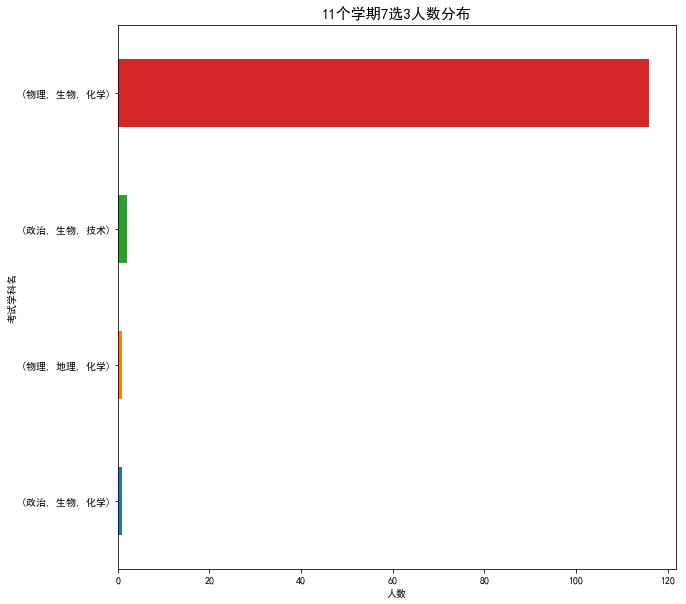

In [281]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(10,10))
fig.set(alpha=1)

# 11个学期7选3人数分布
jici=fenzu.groupby(['考试学科名'])["学生id"].count()
jici=jici.sort_values()# series数据按索引排序sort_index()和按值排序sort_value()
jici.plot(kind='barh')
plt.title(u'11个学期7选3人数分布',fontsize=15)
plt.xlabel('人数')
plt.xticks(rotation=0)
plt.show()

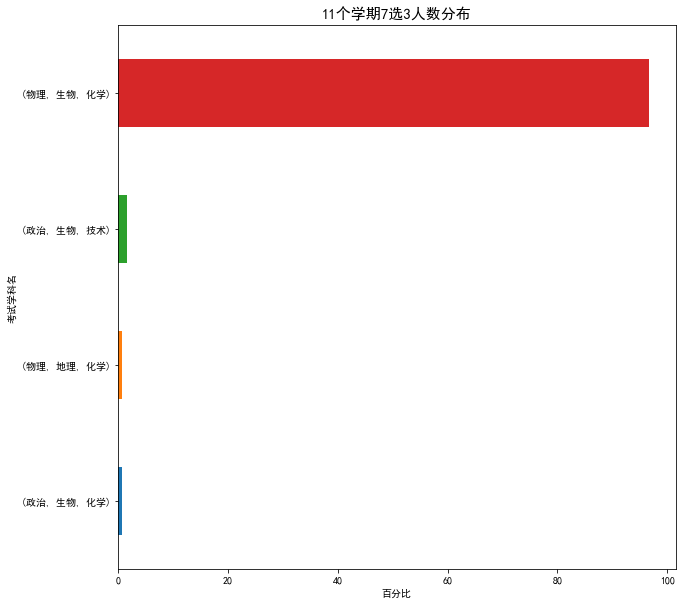

In [231]:
# 11个学期7选3的概率分布
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(10,10))
fig.set(alpha=1)

# 11个学期7选3人数分布
jici1=fenzu.groupby(['考试学科名'])["学生id"].count()
percent=round(jici1/jici.sum(), 3)*100
percent=percent.sort_values()# series数据按索引排序sort_index()和按值排序sort_value()
percent.plot(kind='barh')
plt.title(u'11个学期7选3人数分布',fontsize=15)
plt.xlabel('百分比')
plt.xticks(rotation=0)
plt.show()

### 当前学期7选3分布

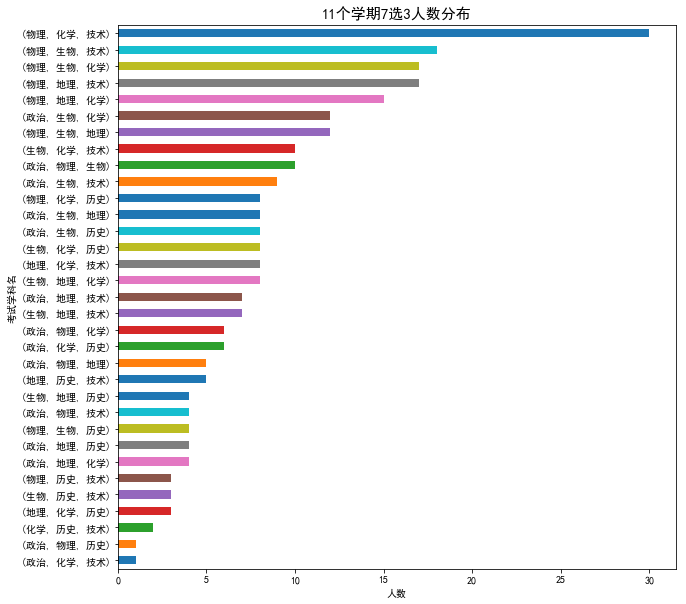

In [13]:
# 筛选考试学期2018-2019-1
fenzu2=fenzu.ix[fenzu['考试学期']=='2018-2019-1']
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(10,10))
fig.set(alpha=1)

# 11个学期7选3人数分布
jici2=fenzu2.groupby(['考试学科名'])["学生id"].count()
jici2=jici2.sort_values()# series数据按索引排序sort_index()和按值排序sort_value()
jici2.plot(kind='barh')
plt.title(u'11个学期7选3人数分布',fontsize=15)
plt.xlabel('人数')
plt.xticks(rotation=0)
plt.show()

List（列表）：1、List写在方括号之间，元素用逗号隔开。2、和字符串一样，list可以被索引和切片。3、List可以使用+操作符进行拼接。4、List中的元素是可以改变的。

tuple（元组）；1、与字符串一样，元组的元素不能修改。2、元组也可以被索引和切片，方法一样。3、注意构造包含0或1个元素的元组的特殊语法规则。4、元组也可以使用+操作符进行拼接。